# Travel Company Churn Prediction 
Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
Choose best model
1) Problem statement
Will the customer churn based on the customer data about their age, frequentFlyer,annual income group, number of times they used service, account synced with their social media, did they use compay service to book hotel
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction
The data consists of 7 column and 954 rows.

2.1 Import required packages and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [3]:
df.shape

(954, 7)

In [11]:
df.duplicated().sum()

507

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info() # check data types and null values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         447 non-null    int64 
 1   FrequentFlyer               447 non-null    object
 2   AnnualIncomeClass           447 non-null    object
 3   ServicesOpted               447 non-null    int64 
 4   AccountSyncedToSocialMedia  447 non-null    object
 5   BookedHotelOrNot            447 non-null    object
 6   Target                      447 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.9+ KB


In [14]:
df.describe() 

,Age,ServicesOpted,Target
count,447.000000,447.000000,447.000000
mean,32.225951,2.782998,0.272931
std,3.464807,1.641632,0.445965
min,27.000000,1.000000,0.000000
25%,29.000000,1.000000,0.000000
50%,31.000000,3.000000,0.000000
75%,35.000000,4.000000,1.000000
max,38.000000,6.000000,1.000000


In [15]:
df.nunique() # CHECKING Number of unique values

Age                           11
FrequentFlyer                  3
AnnualIncomeClass              3
ServicesOpted                  6
AccountSyncedToSocialMedia     2
BookedHotelOrNot               2
Target                         2
dtype: int64

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['Age', 'ServicesOpted', 'Target']

We have 4 categorical features : ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']


In [17]:
# unique values in categorical feature 

for i in categorical_features:
    print(f"Categories in {i} variable:     ",end=" " )
    print(df[i].unique())

Categories in FrequentFlyer variable:      ['No' 'Yes' 'No Record']
Categories in AnnualIncomeClass variable:      ['Middle Income' 'Low Income' 'High Income']
Categories in AccountSyncedToSocialMedia variable:      ['No' 'Yes']
Categories in BookedHotelOrNot variable:      ['Yes' 'No']


#### 3. Visualization 
3.1 Categorical

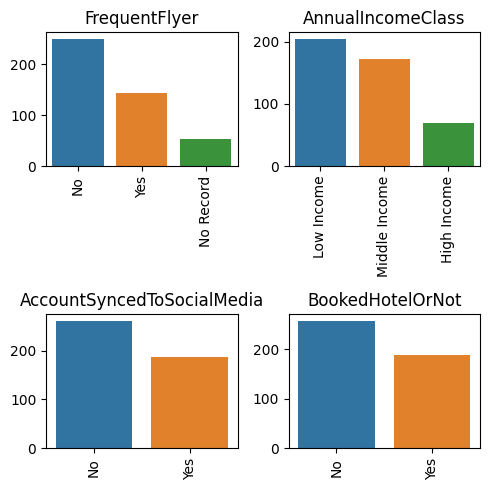

In [23]:
fig = plt.figure(figsize=(5,5))
for i,col in enumerate(categorical_features):
    ax = fig.add_subplot(2, 2, i+1)
    # temp = data[col].value_counts().plot(kind='bar')
    temp = df[col].value_counts()
    sns.barplot(x = temp.index, y = temp.values)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

#### Insights:
Most of the people are not frequent flyers , have low income , social media accounts are not synched and don't book hotel using company's service

Categorical feature with target value

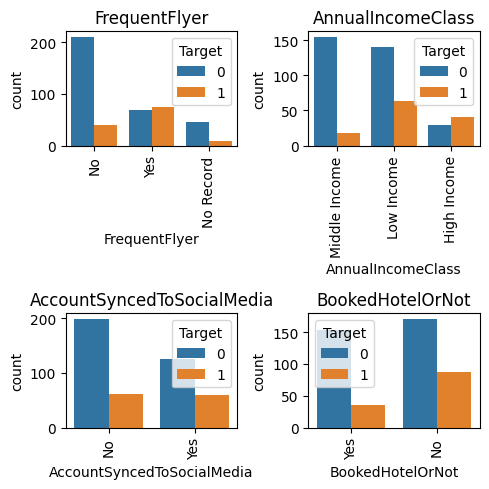

In [25]:
fig = plt.figure(figsize=(5,5))
for i,col in enumerate(categorical_features):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(df , x=col, hue='Target',ax=ax)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

Insights:
- Frequent Flyers are churning more
- People with high income and low income are churning more
- people who didn't use company's service to book hotel have churned more

##### 3.2 numerical features

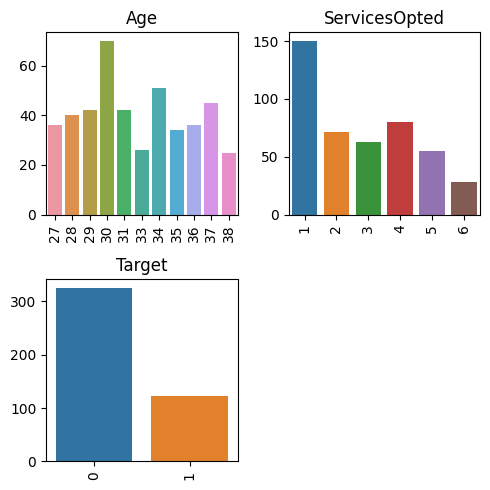

In [26]:
fig = plt.figure(figsize=(5,5))
for i,col in enumerate(numeric_features):
    ax = fig.add_subplot(2, 2, i+1)
    # temp = data[col].value_counts().plot(kind='bar')
    temp = df[col].value_counts()
    sns.barplot(x = temp.index, y = temp.values)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

Insights:
- Most customers are of age 30,
- most number of services opted by customers are 1
- most of the customers didn't churn 

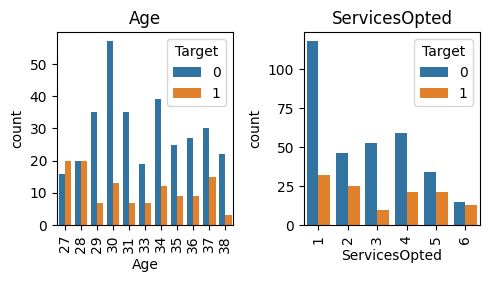

In [30]:
fig = plt.figure(figsize=(5,5))
for i,col in enumerate(numeric_features[:-1]):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(df , x=col, hue='Target',ax=ax)
    plt.xticks(rotation=90)
    plt.title(col)
fig.tight_layout()

Insights:
- people with age 27,28 are churning more 


Text(0.5, 1.0, 'Heatmap')

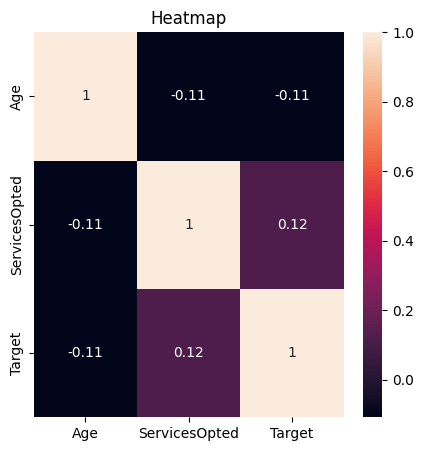

In [32]:
# check correlations between numerical features
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(df[numeric_features].corr(), annot=True, ax = ax)
plt.title('Heatmap')

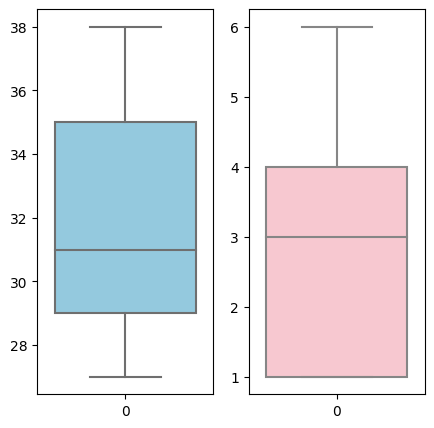

In [37]:
# check outliers 
plt.subplots(1,2,figsize=(5,5))
plt.subplot(121)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(122)
sns.boxplot(df['ServicesOpted'],color='pink')
plt.show()

In [39]:
df.to_csv('data/Customertravel.csv',index= False) #save data without duplicates